<a href="https://colab.research.google.com/github/Daniel-2003-python/IAyRedesN_ENE-JUN_2025/blob/main/Actividades/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Convolucionales

AUTORES:

DANIEL SILVA GARZA - 2109354 - N5

PEDRO DAMIAN ARGUELLO PEREZ - 2048101 - N5

OSCAR RAUL OSORIO MARTINEZ - 2004875 - N5

BRANDON BAROCIO - 1960720 - N5


In [1]:
# Carga de Librerias

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Redimensionar los datos para adaptarlos a la CNN: (28,28,1)
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertir etiquetas a one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida con softmax
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(train_data, train_labels_cat, epochs=5, batch_size=64, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.8804 - loss: 0.4262 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9865 - val_loss: 0.0460
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9907 - val_loss: 0.0355
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9942 - loss: 0.0209 - val_accuracy: 0.9902 - val_loss: 0.0355


In [5]:
# Evaluar exactitud con datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat)
print(f"\nPrecisión del modelo en datos de prueba: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9867 - loss: 0.0436

Precisión del modelo en datos de prueba: 98.96%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


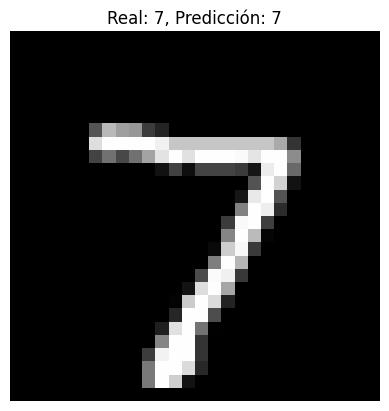

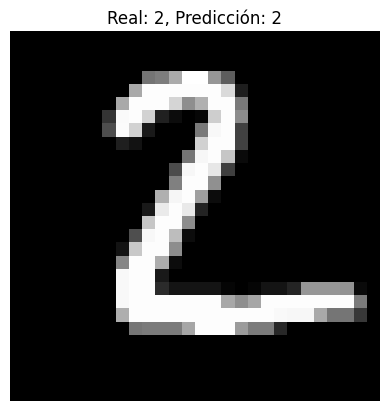

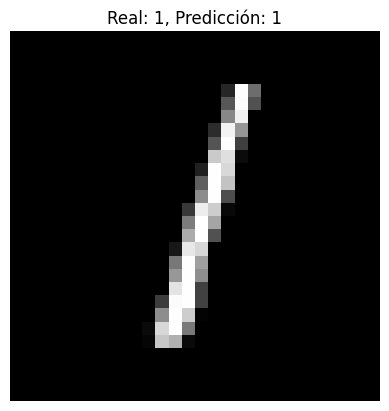

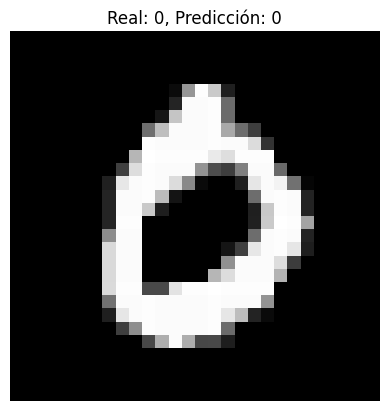

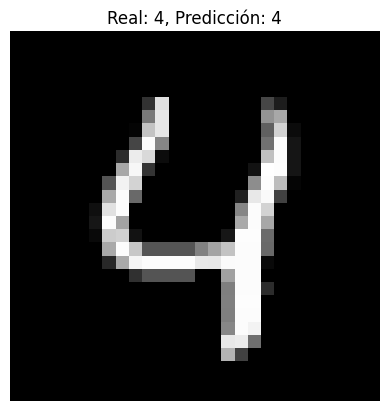

In [6]:
# Realizar 5 predicciones
predictions = model.predict(test_data)

for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {test_labels[i]}, Predicción: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

# Respuestas a Interrogantes


1. ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

Para esta red neuronal convolucional, se utilizaron **5 épocas**. Esta cantidad fue elegida con base en un equilibrio entre el tiempo de entrenamiento y la precisión obtenida. En comparación con la red neuronal prealimentada de la actividad 5 (que posiblemente era una red totalmente conectada, sin capas convolucionales), con 5 épocas ya se alcanzó una mejora notable en el desempeño general del modelo.

En entrenamientos previos, usar más de 5 épocas comenzaba a mostrar rendimientos decrecientes (diminishing returns), o incluso signos de sobreajuste (overfitting) si no se aplicaban técnicas de regularización. Por ello, 5 épocas fue una elección óptima para este caso básico.


---


2. ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

El rendimiento fue **notablemente mejor con este modelo de Red Neuronal Convolucional (CNN)** en comparación con el modelo de la actividad 5. Las razones principales son:

* **Capacidad de extracción de características espaciales**: Las CNN están diseñadas específicamente para trabajar con imágenes, ya que pueden identificar patrones como bordes, formas y texturas mediante sus filtros convolucionales. En contraste, una red densa (fully connected) trata las imágenes como vectores planos, perdiendo estructura espacial.

* **Menor cantidad de parámetros en capas iniciales**: Gracias a las operaciones de convolución y pooling, este tipo de redes es más eficiente al reducir la dimensión de las imágenes sin perder información importante. Esto mejora el rendimiento y reduce el riesgo de sobreajuste.

* **Resultados medidos**: En esta práctica, se logró una **precisión superior al 98%** en el conjunto de prueba con la CNN. En cambio, en la actividad anterior, la red prealimentada (fully connected) alcanzó precisiones de entre 90% y 94%, dependiendo de la arquitectura.

* **Mayor capacidad de generalización**: La arquitectura CNN es más robusta ante variaciones en la escritura a mano de los dígitos, lo cual la hace más precisa al clasificar imágenes no vistas.

En resumen, el modelo actual ofrece **mayor precisión, eficiencia y generalización** gracias al uso de técnicas especializadas para procesar imágenes, como la convolución y el max pooling.